In [67]:
import numpy as np
from nolitsa import lyapunov 
import json
import nolds
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from scipy.spatial.distance import euclidean

In [2]:
with open('data/series.json') as fp:
    lorenz28 = json.load(fp)

In [7]:
data = pd.read_csv('data/trades_btc_usdt.csv')

In [8]:
data.head()

,eventTime,price,quantity,isBuyerMaker,symbol
0,1530917978628,6574.7,0.150870,1,BTCUSDT
1,1530917978674,6574.7,0.038068,1,BTCUSDT
2,1530917979621,6574.7,0.281313,1,BTCUSDT
3,1530917980770,6574.7,0.038044,1,BTCUSDT
4,1530917980896,6574.7,0.011630,1,BTCUSDT


In [9]:
fin = data.price.values

In [216]:
fin[:100]

array([6574.7 , 6574.7 , 6574.7 , 6574.7 , 6574.7 , 6574.79, 6574.89,
       6574.7 , 6574.7 , 6574.7 , 6574.88, 6574.88, 6574.89, 6574.89,
       6574.89, 6574.7 , 6574.7 , 6574.7 , 6574.7 , 6574.7 , 6574.7 ,
       6574.89, 6574.89, 6574.9 , 6574.89, 6574.89, 6574.89, 6574.7 ,
       6574.7 , 6574.7 , 6574.7 , 6574.7 , 6574.79, 6574.88, 6574.7 ,
       6574.7 , 6574.89, 6574.9 , 6574.9 , 6574.89, 6574.89, 6574.89,
       6574.89, 6574.89, 6574.89, 6574.9 , 6574.9 , 6574.89, 6574.89,
       6574.9 , 6574.9 , 6574.89, 6574.9 , 6574.89, 6574.89, 6574.89,
       6574.89, 6574.89, 6574.89, 6574.89, 6574.9 , 6574.9 , 6574.89,
       6574.89, 6574.9 , 6574.9 , 6574.89, 6574.89, 6574.89, 6574.89,
       6574.89, 6574.7 , 6574.89, 6574.9 , 6575.  , 6574.89, 6574.89,
       6574.89, 6574.89, 6574.89, 6574.89, 6574.89, 6574.94, 6574.99,
       6574.89, 6574.89, 6574.7 , 6574.7 , 6574.69, 6574.69, 6574.7 ,
       6574.7 , 6574.7 , 6574.7 , 6574.7 , 6572.86, 6572.86, 6574.69,
       6574.69, 6572

In [3]:
lorenz28[:10]

[0.17450535575235093,
 0.05839779137295202,
 0.0440992367971854,
 0.07365239735349076,
 0.16709482839859596,
 0.42488173619505915,
 1.1512027438326828,
 3.2420943890612737,
 9.003825728926806,
 17.738817135348246]

In [130]:
nolds.lyap_r(lorenz28[200000:250000],emb_dim=5)

/usr/local/lib/python3.6/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 12500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.10163723380633985

In [131]:
nolds.lyap_r(fin[200000:220000],emb_dim=5)

/usr/local/lib/python3.6/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 5000
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/usr/local/lib/python3.6/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 2490
  warnings.warn(msg.format(lag), RuntimeWarning)


0.0049152789168042665

In [38]:
tl = lorenz28[100000:100010]

In [39]:
inds = [0,2,4,6,8]

Text(0.5,0,'t')

<Figure size 720x2160 with 0 Axes>

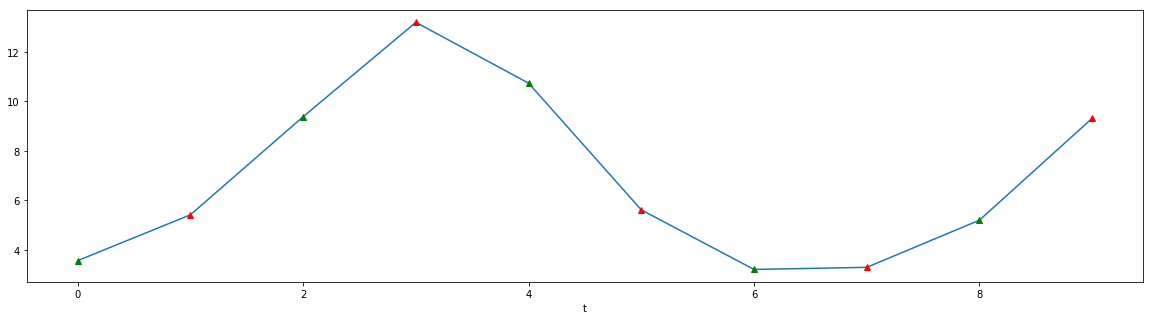

In [45]:
plt.figure(figsize=(10,30))
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(20,5);
ax1.plot(tl);
for ind in inds:
    plt.plot(ind,tl[ind],'g^',linewidth=16.0)
    plt.plot(ind+1,tl[ind+1],'r^',linewidth=16.0)
plt.xlabel('x')
plt.xlabel('t')

Text(0.5,0,'t')

<Figure size 720x2160 with 0 Axes>

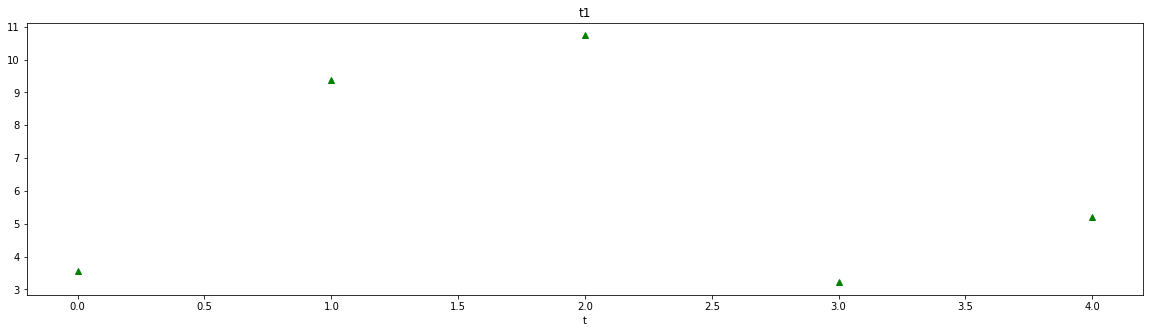

In [36]:
plt.figure(figsize=(10,30))
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(20,5);
ax1.plot(lorenz28[100000:100010:2],'g^');
ax1.set_title("t1");
plt.xlabel('x')
plt.xlabel('t')

In [48]:
def reconstruct(series):
    return [series[i:i+5] for i in range(len(series)-5)]

In [49]:
rec = reconstruct(lorenz28)

In [206]:
rec_fin = reconstruct(fin)

In [56]:
kt = KDTree(rec)

In [63]:
ind = kt.query(rec[0],2)[1][1]

In [68]:
euclidean(rec[0],rec[1])

0.2995736674322706

In [225]:
ks = []
ds = []

In [226]:
for i in range(5000):
    ind = kt.query(rec[i],2)[1][1]
    d0 = kt.query(rec[i],2)[0][1]
    for k in range(0,15):
        ks.append(k)
        d = euclidean(rec_fin[i+k],rec_fin[ind+k])
        ds.append(np.log(d/(0.01*d0)))

In [227]:
mat = np.array(ds).T

In [228]:
np.linalg.lstsq(np.array(ks).reshape(-1,1), mat, rcond=None)[0]

array([1.47353292])